In [1]:
#Import needed library.
import pandas as pd

In [2]:
df = pd.read_csv('ARCAUF_DATA.csv',delimiter=',',header='infer')

In [3]:
df['WEEKDAY'] = pd.DatetimeIndex(df['DATE']).weekday
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df = df[df['GPS_DISTANCE'] !=0]

In [4]:
df['START_MILEAGE'] = df['START_MILEAGE'].str.replace(' ','')
df["START_MILEAGE"] = df.START_MILEAGE.astype(float)
df['END_MILEAGE'] = df['END_MILEAGE'].str.replace(' ','')
df["END_MILEAGE"] = df.END_MILEAGE.astype(float)
df.dtypes

DATE                     object
TRUCK                    object
PLATE                    object
DRIVER                   object
START_DATE               object
START_PLACE              object
END_DATE                 object
END_PLACE                object
DRIVING_TIME             object
STOP_TIME                object
CAN_DISTANCE            float64
GPS_DISTANCE            float64
USED_FUEL               float64
MEAN_USED_FUEL_FHKM      object
MEAN_USED_FUEL_LFMTH    float64
MEAN_SPEED              float64
MAX_SPEED               float64
START_MILEAGE           float64
END_MILEAGE             float64
WEEKDAY                   int64
MONTH                     int64
YEAR                      int64
dtype: object

In [5]:
df["MILEAGE"] = (df['START_MILEAGE'] + df['END_MILEAGE'])/2

In [6]:
# Separate features and labels
X, y = df[['WEEKDAY','MONTH','YEAR','GPS_DISTANCE','MILEAGE']].values, df['USED_FUEL'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[5.00000000e+00 5.00000000e+00 2.02000000e+03 3.07000000e+02
  1.57035082e+08]
 [5.00000000e+00 5.00000000e+00 2.02000000e+03 3.07000000e+02
  4.14757372e+08]
 [5.00000000e+00 5.00000000e+00 2.02000000e+03 3.06000000e+02
  1.00790286e+09]
 [0.00000000e+00 6.00000000e+00 2.02000000e+03 4.37000000e+02
  1.50759622e+08]
 [1.00000000e+00 6.00000000e+00 2.02000000e+03 5.42000000e+02
  6.14342275e+07]
 [1.00000000e+00 6.00000000e+00 2.02000000e+03 3.53000000e+02
  1.00823375e+09]
 [1.00000000e+00 6.00000000e+00 2.02000000e+03 5.88000000e+02
  1.57488840e+08]
 [1.00000000e+00 6.00000000e+00 2.02000000e+03 4.82000000e+02
  1.51227085e+08]
 [1.00000000e+00 6.00000000e+00 2.02000000e+03 5.83000000e+02
  4.15215430e+08]
 [2.00000000e+00 6.00000000e+00 2.02000000e+03 4.02000000e+02
  1.51680270e+08]]

Labels:
[ 89.23 117.44  99.33 151.7  171.18  96.02 144.79 150.64 171.14 122.62]


In [7]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1274 rows
Test Set: 546 rows


In [8]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [9]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [208. 200. 168. 127.  49. 176. 136. 202. 107.  53.]
Actual labels   :  [227.51 153.88 135.06 105.75  49.75 197.73 122.04 254.02 100.93  47.11]


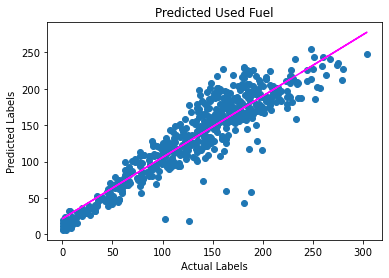

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 642.9682200853988
RMSE: 25.35681801972398
R2: 0.8338752860266646


Lasso() 

MSE: 645.5316412345967
RMSE: 25.40731471908428
R2: 0.8332129708578883


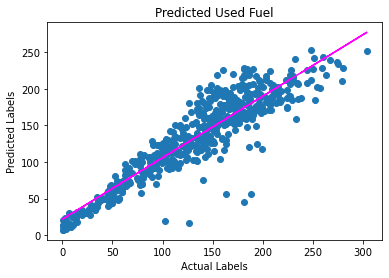

In [12]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 645.5316412345967
RMSE: 25.40731471908428
R2: 0.8332129708578883


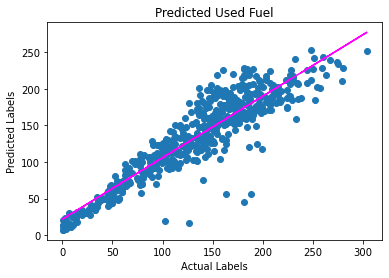

In [13]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 644.6469401213368
RMSE: 25.38989838737715
R2: 0.8334415524810557


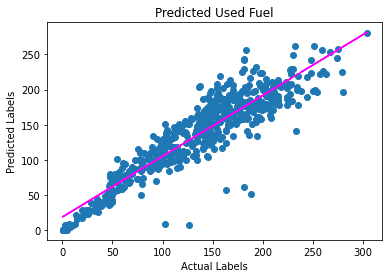

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 577.8321663089181
RMSE: 24.038139826303492
R2: 0.8507045910606403


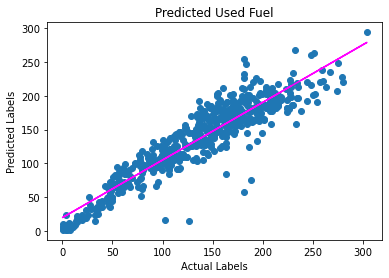

In [15]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 576.7686932910863
RMSE: 24.016009104159796
R2: 0.8509793622629904


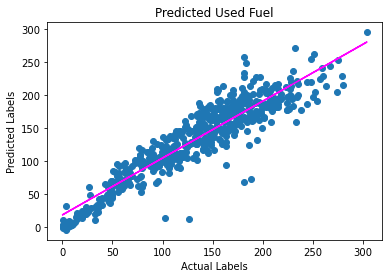

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted Used Fuel')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()